## qflib Library Examples

In [1]:
import qflib as qf
import numpy as np
import os
import matplotlib.pyplot as plt
print("qflib version: {0}".format(qf.version()))
print("pid: {0}".format(os.getpid()))

qflib version: 0.2.0-debug
pid: 15812


In [2]:
name = "World"
print(qf.sayHello(name))

Hello World!


In [3]:
x = [1, 2, 3]
y = [4, 5]
op = qf.outerProd(x, y)
print(f'x: {x}\ny: {y}')
print(f'outerProd:\n{op}')

x: [1, 2, 3]
y: [4, 5]
outerProd:
[[ 4.  5.]
 [ 8. 10.]
 [12. 15.]]


### Analytic Prices

In [4]:
#fwdprice
fwdpx = qf.fwdPrice(spot = 100, timetoexp = 1.0, intrate = 0.02, divyield = 0.04)
print(f'FwdPrice={fwdpx:.4f}')

FwdPrice=98.0199


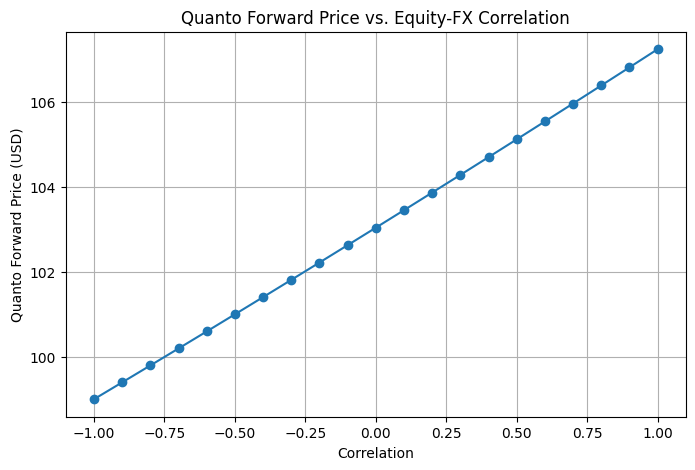

In [5]:
spot          = 100.0   
time_to_exp   = 1.0     
r_foreign     = 0.04    # 4% Japanese risk-free rate
div_yield     = 0.01    # 1% dividend yield on XYZ
asset_vol     = 0.40    # 40% p.a. volatility of the equity
fx_vol        = 0.10    # 10% p.a. volatility of USDJPY
q_fix         = 1.0     # Fixed USD/JPY FX rate for the quanto
# correlation from -1.0 to +1.0
corr_values   = np.linspace(-1.0, 1.0, 21)

fwd_prices = []
for rho in corr_values:
    fwd = qf.quantoFwdPrice(spot, 
                         time_to_exp, 
                         r_foreign, 
                         div_yield,
                         asset_vol, 
                         fx_vol, 
                         rho, 
                         q_fix)
    fwd_prices.append(fwd)

plt.figure(figsize=(8, 5))
plt.plot(corr_values, fwd_prices, marker='o')
plt.title("Quanto Forward Price vs. Equity-FX Correlation")
plt.xlabel("Correlation")
plt.ylabel("Quanto Forward Price (USD)")
plt.grid(True)
plt.show()


In [7]:
S0       = 100.0   # initial spot
T        = 1.0     # time in years
r        = 0.04    # 4% risk-free
q        = 0.01    # 1% dividend
sigma    = 0.40    # 40% volatility
nSims    = 10_000  # number of simulations

# Theoretical forward under r-q:
F_exact = S0 * np.exp((r - q) * T)

U = np.random.random_sample(nSims)  # uniform(0,1) draws
# Transform to standard normal
Z = np.array([qf.normalInvCdf(u) for u in U]) 

# Computing S(T) paths under the (risk-neutral) GBM formula:
ST = S0 * np.exp( (r - q - 0.5 * sigma**2) * T  +  sigma * np.sqrt(T) * Z )

sample_mean = ST.mean()
sample_std  = ST.std(ddof=1)  # sample standard deviation

# standard error of the mean 
sem = sample_std / np.sqrt(nSims)

# difference from theoretical forward:
diff = sample_mean - F_exact

# difference as multiple of standard error:
z_score = diff / sem

print(f"Theoretical forward F_exact = {F_exact:.4f}")
print(f"Sample mean of S(T)        = {sample_mean:.4f}")
print(f"Difference                 = {diff:.4f}")
print(f"Standard error of mean     = {sem:.4f}")
print(f"Difference / Std Error     = {z_score:.2f}")

Theoretical forward F_exact = 103.0455
Sample mean of S(T)        = 103.5766
Difference                 = 0.5311
Standard error of mean     = 0.4305
Difference / Std Error     = 1.23
